In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_1samp
from matplotlib import style
%matplotlib inline

In [2]:
raw_data = pd.read_csv('file:///C:/Users/JChaotogo/Desktop/New%20folder/Pokemon.csv')

In [3]:
raw_data.head(20)

#                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
0    1                  Bulbasaur  Grass  Poison    318  45      49       49   
1    2                    Ivysaur  Grass  Poison    405  60      62       63   
2    3                   Venusaur  Grass  Poison    525  80      82       83   
3    3      VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4    4                 Charmander   Fire     NaN    309  39      52       43   
5    5                 Charmeleon   Fire     NaN    405  58      64       58   
6    6                  Charizard   Fire  Flying    534  78      84       78   
7    6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8    6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   
9    7                   Squirtle  Water     NaN    314  44      48       65   
10   8                  Wartortle  Water     NaN    405  59      63       80   
11   9                  Blastoise  Water     NaN    530  79      83      100   
12   9    BlastoiseMega Blastoise  Water     NaN    630  79     103      120   
13  10                   Caterpie    Bug     NaN    195  45      30       35   
14  11                    Metapod    Bug     NaN    205  50      20       55   
15  12                 Butterfree    Bug  Flying    395  60      45       50   
16  13                     Weedle    Bug  Poison    195  40      35       30   
17  14                     Kakuna    Bug  Poison    205  45      25       50   
18  15                   Beedrill    Bug  Poison    395  65      90       40   
19  15      BeedrillMega Beedrill    Bug  Poison    495  65     150       40   

    Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0        65       65     45           1      False  
1        80       80     60           1      False  
2       100      100     80           1      False  
3       122      120     80           1      False  
4        60       50     65           1      False  
5        80       65     80           1      False  
6       109       85    100           1      False  
7       130       85    100           1      False  
8       159      115    100           1      False  
9        50       64     43           1      False  
10       65       80     58           1      False  
11       85      105     78           1      False  
12      135      115     78           1      False  
13       20       20     45           1      False  
14       25       25     30           1      False  
15       90       80     70           1      False  
16       20       20     50           1      False  
17       25       25     35           1      False  
18       45       80     75           1      False  
19       15       80    145           1      False

In [20]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

Continuous Variables: Total, HP, Attack
Categorical Variables: Type 1, Generation

In [4]:
df = raw_data
df.Defense.describe()

count    800.000000
mean      73.842500
std       31.183501
min        5.000000
25%       50.000000
50%       70.000000
75%       90.000000
max      230.000000
Name: Defense, dtype: float64

#                       Name    Type 1  Type 2  Total   HP  Attack  \
0      1                  Bulbasaur     Grass  Poison    318   45      49   
1      2                    Ivysaur     Grass  Poison    405   60      62   
2      3                   Venusaur     Grass  Poison    525   80      82   
3      3      VenusaurMega Venusaur     Grass  Poison    625   80     100   
4      4                 Charmander      Fire     NaN    309   39      52   
5      5                 Charmeleon      Fire     NaN    405   58      64   
6      6                  Charizard      Fire  Flying    534   78      84   
7      6  CharizardMega Charizard X      Fire  Dragon    634   78     130   
8      6  CharizardMega Charizard Y      Fire  Flying    634   78     104   
9      7                   Squirtle     Water     NaN    314   44      48   
10     8                  Wartortle     Water     NaN    405   59      63   
11     9                  Blastoise     Water     NaN    530   79      83   
12     9    BlastoiseMega Blastoise     Water     NaN    630   79     103   
13    10                   Caterpie       Bug     NaN    195   45      30   
14    11                    Metapod       Bug     NaN    205   50      20   
15    12                 Butterfree       Bug  Flying    395   60      45   
16    13                     Weedle       Bug  Poison    195   40      35   
17    14                     Kakuna       Bug  Poison    205   45      25   
18    15                   Beedrill       Bug  Poison    395   65      90   
19    15      BeedrillMega Beedrill       Bug  Poison    495   65     150   
20    16                     Pidgey    Normal  Flying    251   40      45   
21    17                  Pidgeotto    Normal  Flying    349   63      60   
22    18                    Pidgeot    Normal  Flying    479   83      80   
23    18        PidgeotMega Pidgeot    Normal  Flying    579   83      80   
24    19                    Rattata    Normal     NaN    253   30      56   
25    20                   Raticate    Normal     NaN    413   55      81   
26    21                    Spearow    Normal  Flying    262   40      60   
27    22                     Fearow    Normal  Flying    442   65      90   
28    23                      Ekans    Poison     NaN    288   35      60   
29    24                      Arbok    Poison     NaN    438   60      85   
..   ...                        ...       ...     ...    ...  ...     ...   
770  700                    Sylveon     Fairy     NaN    525   95      65   
771  701                   Hawlucha  Fighting  Flying    500   78      92   
772  702                    Dedenne  Electric   Fairy    431   67      58   
773  703                    Carbink      Rock   Fairy    500   50      50   
774  704                      Goomy    Dragon     NaN    300   45      50   
775  705                    Sliggoo    Dragon     NaN    452   68      75   
776  706                     Goodra    Dragon     NaN    600   90     100   
777  707                     Klefki     Steel   Fairy    470   57      80   
778  708                   Phantump     Ghost   Grass    309   43      70   
779  709                  Trevenant     Ghost   Grass    474   85     110   
780  710      PumpkabooAverage Size     Ghost   Grass    335   49      66   
781  710        PumpkabooSmall Size     Ghost   Grass    335   44      66   
782  710        PumpkabooLarge Size     Ghost   Grass    335   54      66   
783  710        PumpkabooSuper Size     Ghost   Grass    335   59      66   
784  711      GourgeistAverage Size     Ghost   Grass    494   65      90   
785  711        GourgeistSmall Size     Ghost   Grass    494   55      85   
786  711        GourgeistLarge Size     Ghost   Grass    494   75      95   
787  711        GourgeistSuper Size     Ghost   Grass    494   85     100   
788  712                   Bergmite       Ice     NaN    304   55      69   
789  713                    Avalugg       Ice     NaN    514   95     117   
790

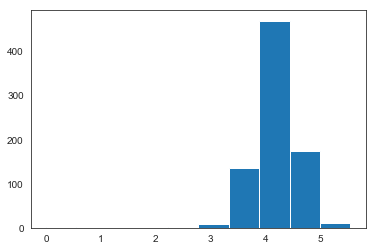

In [58]:
#HP seems to have a normal distribution.
#Add a feature based on the log of HP where high HP is above the threshold of log HP > 4.17
plt.hist(np.log(df.HP))
np.log(df.HP).describe()
df['highHP'] = np.where(np.log(df.HP)>4.17, 1, 0)

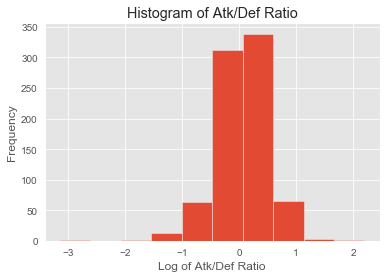

count    800.000000
mean       0.061493
std        0.435667
min       -3.135494
25%       -0.187813
50%        0.071550
75%        0.348307
max        2.197225
dtype: float64


In [71]:
#Here we add the log of atk/def ratio feature, where the mean is 0. positive values represent high attack/def ratio, 
#and neg values high def/attack ratio.
plt.style.use('ggplot')
plt.hist(np.log(df.Attack/df.Defense))
plt.xlabel('Log of Atk/Def Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Atk/Def Ratio')
plt.show()
print(np.log(df.Attack/df.Defense).describe())
df['atkdef_ratio_ishigh'] = np.where(np.log(df.Attack/df.Defense)>0, 1, 0)

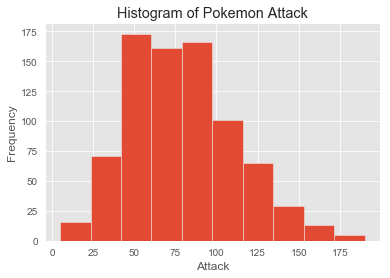

In [70]:
plt.hist(df.Attack)
plt.xlabel('Attack')
plt.ylabel('Frequency')
plt.title('Histogram of Pokemon Attack')
plt.show()


C:\Users\JChaotogo\AppData\Local\Programs\Python\Python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


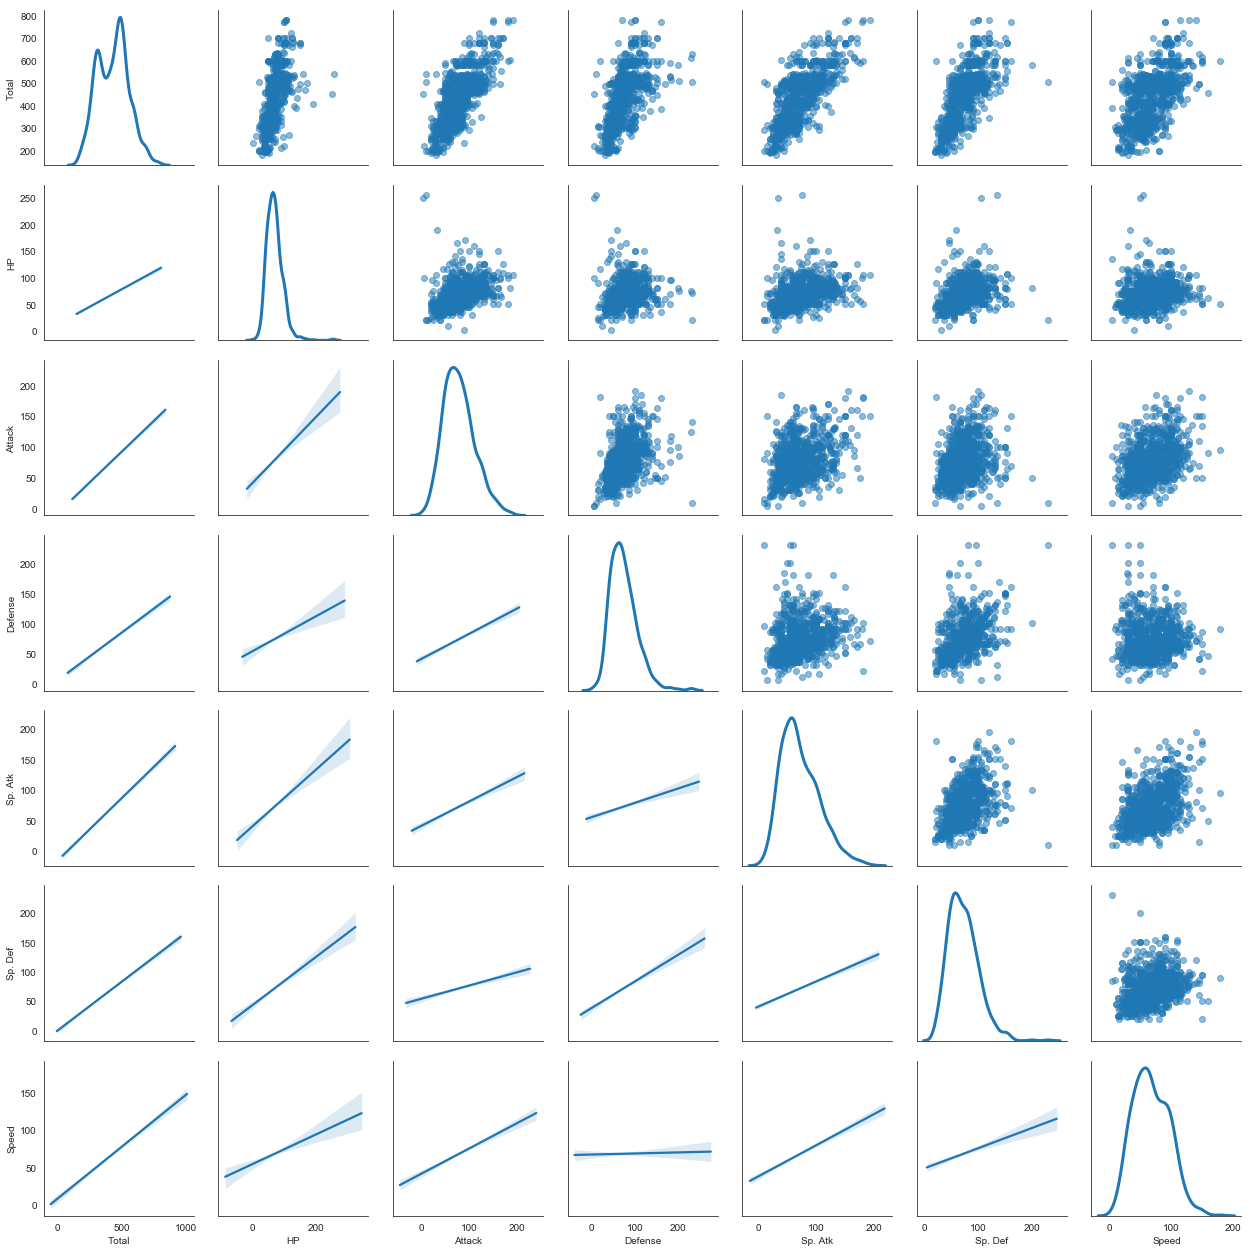

In [8]:
#Here we use a scatter plot to graph the relationship between each of the continuous variables and include the slope.
sns.set_style('white')
#Add Jitter to prevent overlapping points
df_jittered = df.loc[:, 'Total':'Speed']

jitter = pd.DataFrame(
    np.random.uniform(-.3,.3, size=(df_jittered.shape)),
    columns=df_jittered.columns)
df_jittered = df_jittered.add(jitter)

g = sns.PairGrid(df_jittered, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

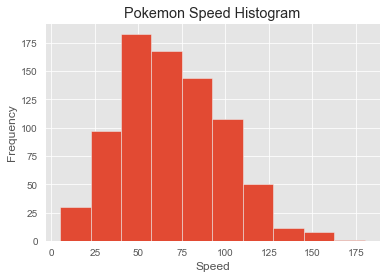

count    800.000000
mean      68.277500
std       29.060474
min        5.000000
25%       45.000000
50%       65.000000
75%       90.000000
max      180.000000
Name: Speed, dtype: float64


In [72]:
#Speed seems to have to lowest correlation with other stats so we will make it a feature. Values > mean are high speed.
plt.hist(df.Speed)
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Pokemon Speed Histogram')
plt.show()
print(df.Speed.describe())
df['highspeed'] = np.where(df.Speed>68.28, 1, 0)

            Total        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
Total    1.000000  0.618817  0.736187  0.612726  0.747156  0.717574  0.575981
HP       0.618817  1.000000  0.422406  0.239487  0.362305  0.378412  0.175976
Attack   0.736187  0.422406  1.000000  0.438738  0.396456  0.264035  0.381051
Defense  0.612726  0.239487  0.438738  1.000000  0.223655  0.510578  0.015267
Sp. Atk  0.747156  0.362305  0.396456  0.223655  1.000000  0.506340  0.472732
Sp. Def  0.717574  0.378412  0.264035  0.510578  0.506340  1.000000  0.259197
Speed    0.575981  0.175976  0.381051  0.015267  0.472732  0.259197  1.000000


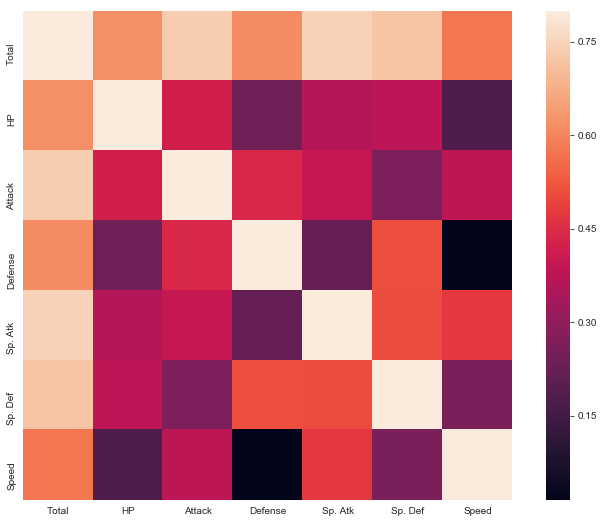

In [9]:
correlation = df_jittered.corr()
print(correlation)

fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(correlation, vmax=.8, square=True)
plt.show()

The Total number for each Pokemon is highly correlated with each continuous variable HP:Speed. This makes sense because Total is the sum of all the values.

The HP and Attack and Sp. Atk values do not appear to differ significantly between the two generations. Generation 6 seems to have slightly higher Defense and Sp. Def and slightly lower Speed on average compared with Generation 1 Pokemon. However, the p-value of 11-14% introduces some uncertainty.

In [64]:
#For the categorical variables, we will create add dummies to the feature list while dropping the columns to create a
#dataframe of only features.
todummy_list = ['Generation', 'Type 1', 'Legendary']
def dummy_df(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
        df = df.drop(x, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

features = dummy_df(df, todummy_list)
features.drop(['Name', 'Type 2', 'HP', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', '#', 'Total', 'Attack'], 1)

isHPhigh  atkdef_ratio_ishigh  highspeed  highHP  Generation_1  \
0           0                    0          0       0             1   
1           0                    0          0       0             1   
2           1                    0          1       1             1   
3           1                    0          1       1             1   
4           0                    1          0       0             1   
5           0                    1          1       0             1   
6           1                    1          1       1             1   
7           1                    1          1       1             1   
8           1                    1          1       1             1   
9           0                    0          0       0             1   
10          0                    0          0       0             1   
11          1                    0          1       1             1   
12          1                    0          1       1             1   
13          0                    0          0       0             1   
14          0                    0          0       0             1   
15          0                    0          1       0             1   
16          0                    1          0       0             1   
17          0                    0          0       0             1   
18          1                    1          1       1             1   
19          1                    1          1       1             1   
20          0                    1          0       0             1   
21          0                    1          1       0             1   
22          1                    1          1       1             1   
23          1                    0          1       1             1   
24          0                    1          1       0             1   
25          0                    1          1       0             1   
26          0                    1          1       0             1   
27          1                    1          1       1             1   
28          0                    1          0       0             1   
29          0                    1          1       0             1   
..        ...                  ...        ...     ...           ...   
770         1                    0          0       1             0   
771         1                    1          1       1             0   
772         1                    1          1       1             0   
773         0                    0          0       0             0   
774         0                    1          0       0             0   
775         1                    1          0       1             0   
776         1                    1          1       1             0   
777         0                    0          1       0             0   
778         0                    1          0       0             0   
779         1                    1          0       1             0   
780         0                    0          0       0             0   
781         0                    0          0       0             0   
782         0                    0          0       0             0   
783         0                    0          0       0             0   
784         1                    0          1       1             0   
785         0                    0          1       0             0   
786         1                    0          1       1             0   
787         1                    0          0       1             0   
788         0                    0          0       0             0   
789         1                    0          0       1             0   
790         0                    0          0       0             0   
791         1                    0          1       1             0   
792         1                    1          1       1             0   
793         1                    1          1       1             0   
794         1                

Above we have 30 features. We can probably narrow them down by grouping together some of the type 1 values. The 5 features I feel are most useful are those for Legendary, Generation, Atk/Def ratio, HP, and Speed.

The legendary feature can be important because Pokemon classified as legendary are usually sought after, therefore it is worth using this feature to gauge the effect it has on the other statistics.

Generation can be an important feature because there is potential for power-creep for pokemon released later. The statistics for future generations can be used to analyze any shifts in statistic focus.

The attack/defense ratio is important in determining the primary focus of the pokemon. A pokemon with high points in both can be overpowered, so seeing how they spec into these attributes is important.

Speed correlated the least out of all the other statistics, and it can be interesting to see what effect speed has on the overall power of the pokemon.

HP is also an important factor because it denotes the survivability of the pokemon. HP can also be compared to statistics such as Attack and Speed to see if the pokemon sacrificed any points.